<a href="https://colab.research.google.com/github/ValeriaPerea20/TrabajosAD/blob/main/Entregable2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parte 1: Introducción a Python Escribir un programa que reciba una lista de números enteros y determine la cantidad de números pares e impares

In [1]:
def contar(lista):
  pares = 0
  impares = 0
  for numero in lista:
    if numero % 2 == 0:
      pares += 1
    else:
      impares += 1
  return pares, impares

# Ejemplo de uso:
numeros = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
c_pares, c_impares = contar(numeros)

print("La lista es:", numeros)
print("Cantidad de números pares:", c_pares)
print("Cantidad de números impares:", c_impares)

La lista es: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Cantidad de números pares: 8
Cantidad de números impares: 8


Parte 2: Manipulación de datos con Pandas y NumPy
- Carga y exploración inicial de datos:
• Importar el archivo CSV que se entrega en el laboratorio.
• Explorar datos con funciones como .head(), .info(), y .describe().
- Transformación de datos:
• Crear una nueva columna llamada “Ingresos Totales”.
• Filtrar datos según una condición (Filtrar aquellos productos de los que se hay vendido
más de 40 unidades).
• Filtrar los 10 precios más altos.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving CSV Laboratorio 2 AD-B.csv to CSV Laboratorio 2 AD-B.csv


In [3]:
import pandas as pd

datos = pd.read_csv('CSV Laboratorio 2 AD-B.csv')
#Exploración de datos
print(datos.head())
print()
print(datos.info())
print()
print(datos.describe())

  Producto      Mes Sucursal  Precio_unitario  Cantidad_vendida
0        A    Enero    Norte            15.24                45
1        A    Enero      Sur            92.37                11
2        A    Enero     Este            49.81                29
3        A    Enero    Oeste            31.58                36
4        A  Febrero    Norte            18.45                25

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Producto          64 non-null     object 
 1   Mes               64 non-null     object 
 2   Sucursal          64 non-null     object 
 3   Precio_unitario   64 non-null     float64
 4   Cantidad_vendida  64 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB
None

       Precio_unitario  Cantidad_vendida
count        64.000000         64.000000
mean         54.157813         27.

In [6]:
#Transformación datos
#Nueva columna
print("Nueva columna Ingresos_Totales")
datos['Ingresos_Totales'] = datos['Precio_unitario'] * datos['Cantidad_vendida']
print(datos)
print("Filtrado de datos")
#Filtrar datos con condición
datos_filtrados = datos[datos['Cantidad_vendida'] > 40]
print(datos_filtrados)
print("Filtrado de los 10 precios más altos")
#Filtrar los 10 precios más altos
precios_altos = datos.nlargest(10, 'Precio_unitario')
print(precios_altos)

Nueva columna Ingresos_Totales
   Producto      Mes Sucursal  Precio_unitario  Cantidad_vendida  \
0         A    Enero    Norte            15.24                45   
1         A    Enero      Sur            92.37                11   
2         A    Enero     Este            49.81                29   
3         A    Enero    Oeste            31.58                36   
4         A  Febrero    Norte            18.45                25   
..      ...      ...      ...              ...               ...   
59        D    Marzo    Oeste            44.69                36   
60        D    Abril    Norte            71.35                23   
61        D    Abril      Sur            40.66                16   
62        D    Abril     Este            33.46                39   
63        D    Abril    Oeste            54.64                45   

    Ingresos_Totales  
0             685.80  
1            1016.07  
2            1444.49  
3            1136.88  
4             461.25  
..            

Parte 3: Visualización de datos con Matplotlib y Seaborn
- Gráficos básicos con Matplotlib:
• Crear un gráfico de barras que agrupe las ventas por sucursal y mes, y sume las
cantidades vendidas.
• Crear un gráfico de dispersión para mostrar la relación entre las columnas “Precio
Unitario” y “Cantidad Vendida”.

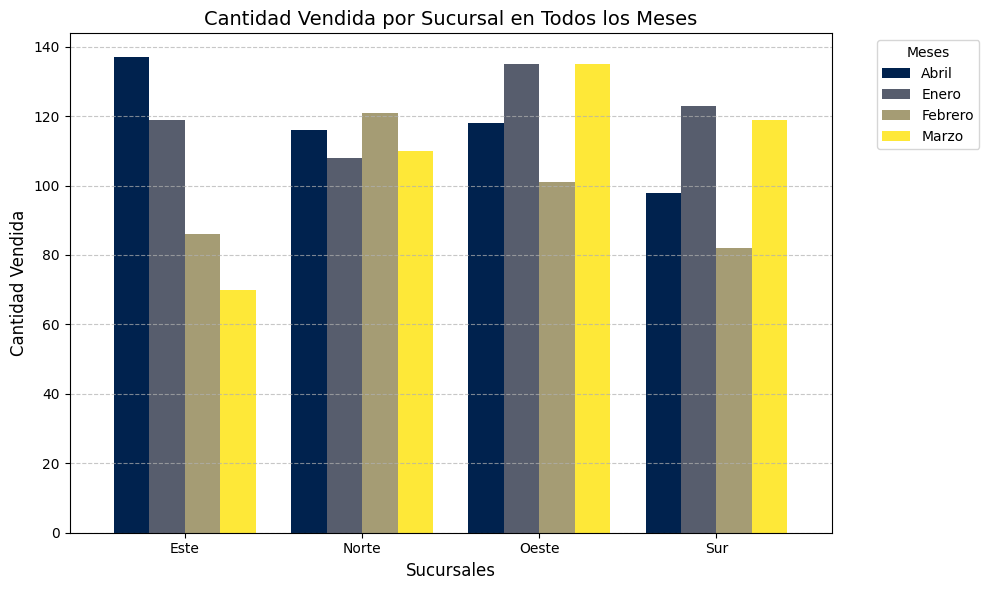

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar ventas por sucursal y mes, sumando cantidades vendidas
datos_resumen = datos.groupby(["Sucursal", "Mes"])["Cantidad_vendida"].sum().unstack()

#Gráfico de barras
datos_resumen.plot(kind="bar", figsize=(10, 6), width=0.8, colormap="cividis")

plt.title("Cantidad Vendida por Sucursal en Todos los Meses", fontsize=14)
plt.xlabel("Sucursales", fontsize=12)
plt.ylabel("Cantidad Vendida", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Meses", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


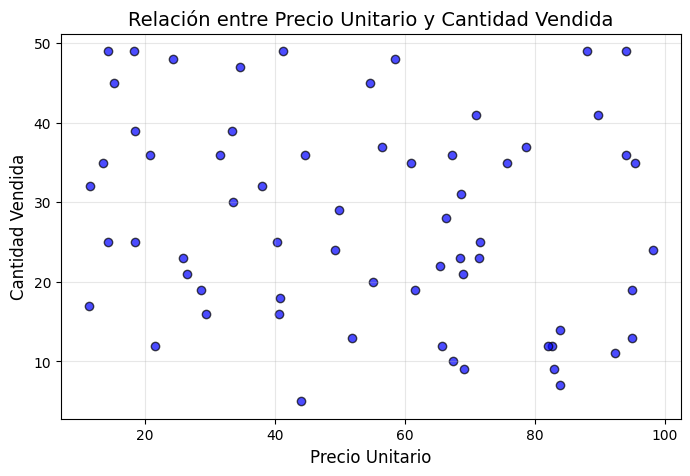

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 5))
plt.scatter(datos["Precio_unitario"], datos["Cantidad_vendida"], color='blue', alpha=0.7, edgecolor='black')

plt.title("Relación entre Precio Unitario y Cantidad Vendida", fontsize=14)
plt.xlabel("Precio Unitario", fontsize=12)
plt.ylabel("Cantidad Vendida", fontsize=12)
plt.grid(alpha=0.3)

plt.show()